In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto=pd.read_csv('study.csv')

In [3]:
auto

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1.Males and Female participated in a test

Text(0.5, 1.0, 'MALE VS FEMALE BUYERS')

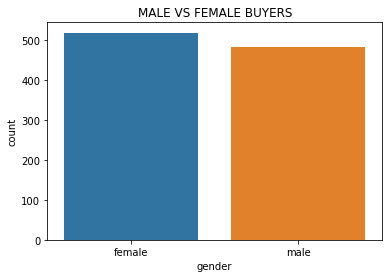

In [4]:
sns.countplot(x='gender',data=auto)
plt.title('MALE VS FEMALE BUYERS')

In [5]:
pd.value_counts(auto['gender'].values)

female    518
male      482
dtype: int64

# 2.about the students parental level of education

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

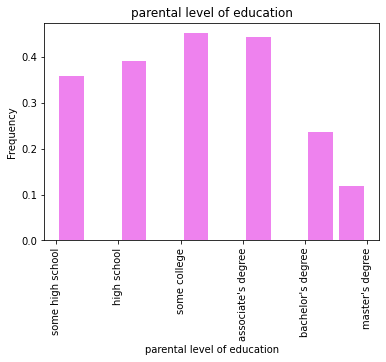

In [6]:
plt.figure()
plt.hist(auto['parental level of education'],color='violet',rwidth=0.8,density=True)
plt.title('parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.xticks()
plt.yticks()

In [7]:
pd.value_counts(auto['parental level of education'].values)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

# 3.a.average for math, reading and writing based on Gender

In [11]:
top=auto.groupby('gender')[['writing score']].mean()
top

,writing score
gender,
female,72.467181
male,63.446058


In [12]:
top=auto.groupby('gender')[['math score']].mean()
top

,math score
gender,
female,63.376448
male,68.821577


In [13]:
top=auto.groupby('gender')[['reading score']].mean()
top

,reading score
gender,
female,72.590734
male,65.545643


# 3.b.average for math, reading and writing based on Test preparation course

In [17]:
top=auto.groupby('test preparation course')[['math score']].mean()
top

,math score
test preparation course,
completed,69.96648
none,63.78972


In [18]:
top=auto.groupby('test preparation course')[['reading score']].mean()
top

,reading score
test preparation course,
completed,74.175978
none,66.417445


In [19]:
top=auto.groupby('test preparation course')[['writing score']].mean()
top

,writing score
test preparation course,
completed,74.684358
none,64.457944


# 4.a.What do you think about the scoring variation for math, reading and writing based on Gender

In [20]:
top=auto.groupby('gender')[['math score']].std()
top

,math score
gender,
female,16.029928
male,14.556411


<AxesSubplot:xlabel='gender', ylabel='math score'>

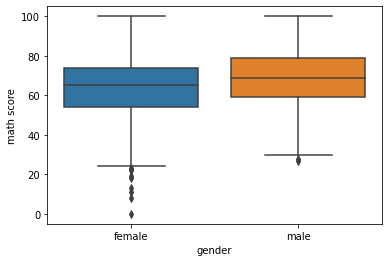

In [23]:
sns.boxplot(x='gender',y='math score',data=auto)

In [26]:
top=auto.groupby('gender')[['reading score']].std()
top

,reading score
gender,
female,14.411018
male,14.149594


<AxesSubplot:xlabel='gender', ylabel='reading score'>

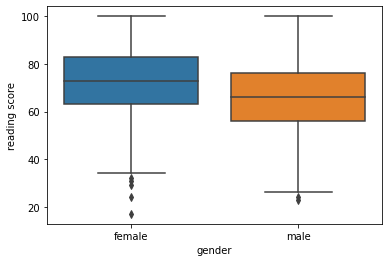

In [27]:
sns.boxplot(x='gender',y='reading score',data=auto)

In [28]:
top=auto.groupby('gender')[['writing score']].std()
top

,writing score
gender,
female,14.844842
male,14.227225


<AxesSubplot:xlabel='gender', ylabel='writing score'>

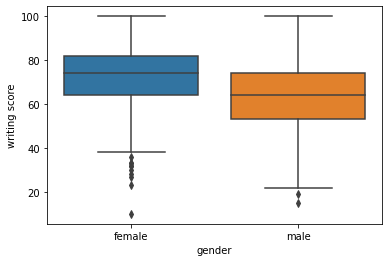

In [31]:
sns.boxplot(x='gender',y='writing score',data=auto)

# 4.b.Test preparation course

In [32]:
top=auto.groupby('test preparation course')[['math score']].std()
top

,math score
test preparation course,
completed,14.521847
none,15.705689


<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

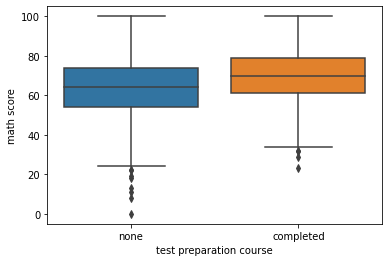

In [33]:
sns.boxplot(x='test preparation course',y='math score',data=auto)

In [34]:
top=auto.groupby('test preparation course')[['writing score']].std()
top

,writing score
test preparation course,
completed,13.236412
none,15.041667


<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

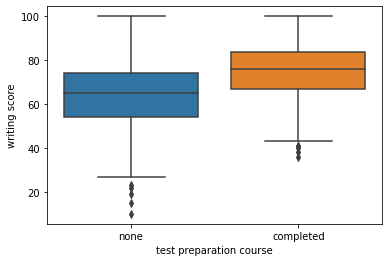

In [35]:
sns.boxplot(x='test preparation course',y='writing score',data=auto)

In [36]:
top=auto.groupby('test preparation course')[['reading score']].std()
top

,reading score
test preparation course,
completed,13.537572
none,14.608896


<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

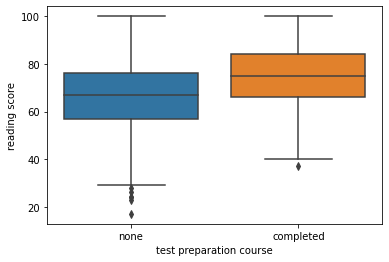

In [37]:
sns.boxplot(x='test preparation course',y='reading score',data=auto)

# 5. top 25% of students based on their maths score

In [38]:
auto.nlargest(250,'math score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
